In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [168]:
df = pd.read_csv("train.csv")

df_scaled = df.drop("SalePrice" ,axis=1)#scaled data
#df_scaled = df

df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000


In [169]:
m,n=df_scaled.shape
print(m, n)

1168 10


In [170]:
#standardization Scaling 
"""
for i in range(n):
    x= df.iloc[:, i]
    mean_value = x.mean()
    std_deviation = abs(x.std())
    stanadardized_x = (x - mean_value) / std_deviation
    df_scaled.iloc[:,i]= stanadardized_x

df_stanadardized.head()

"""
#Min Max Scaling
for i in range(n):    
    series = df.iloc[:, i]
    
    # Min-Max Scaling (Normalization)
    min_value = series.min()
    max_value = series.max()
    df_scaled.iloc[:,i] = (series - min_value) / (max_value - min_value)



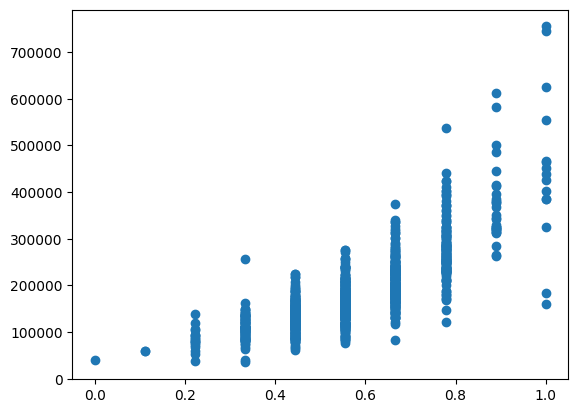

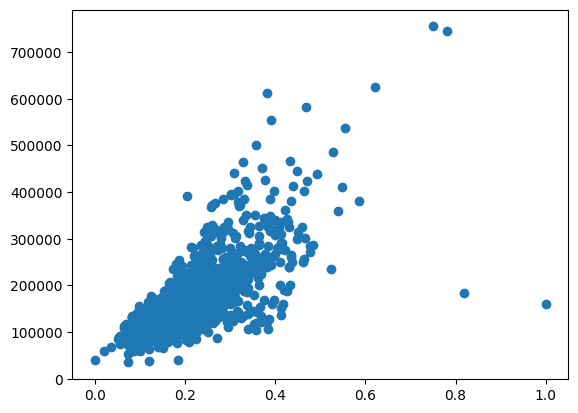

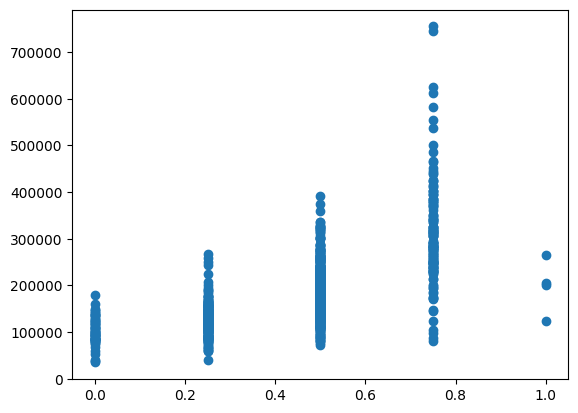

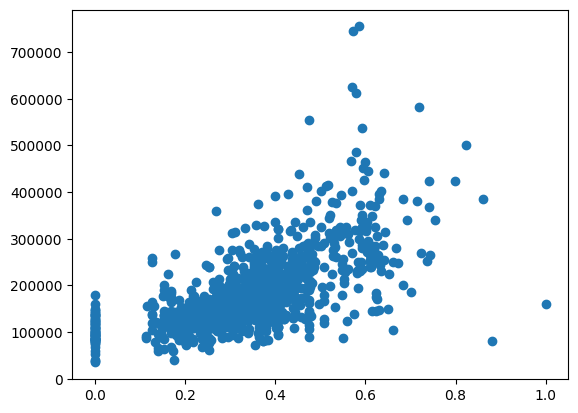

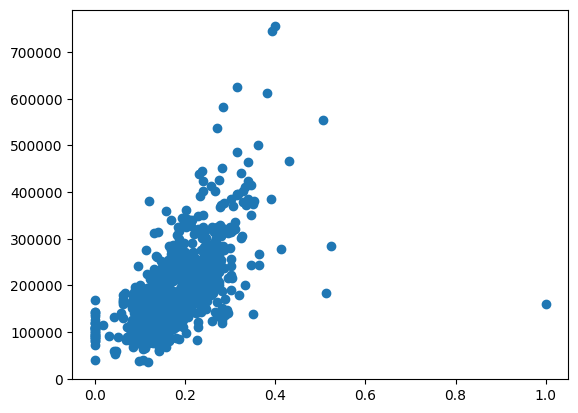

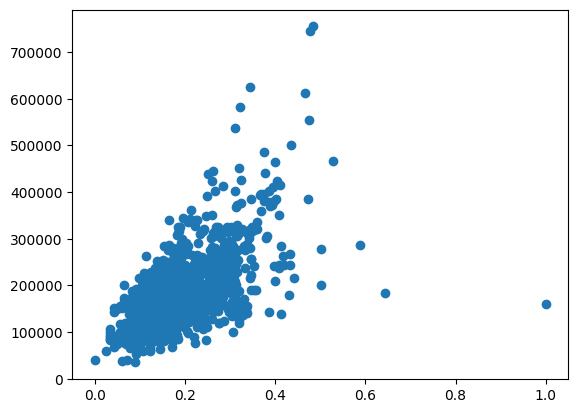

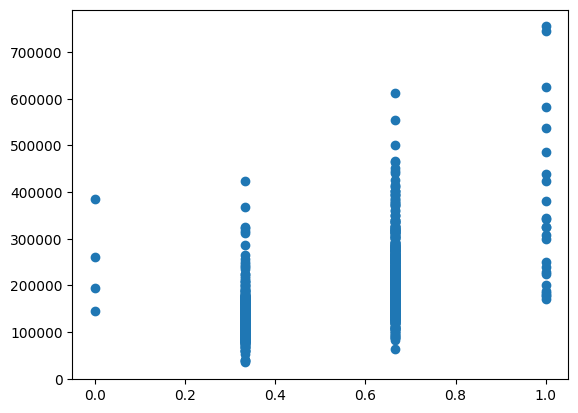

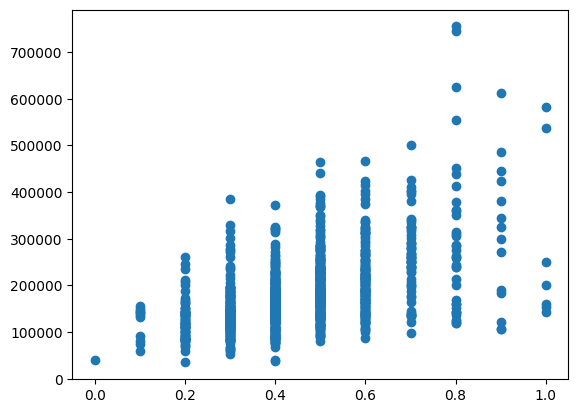

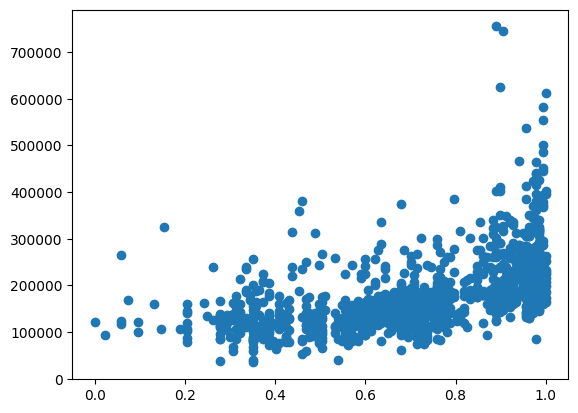

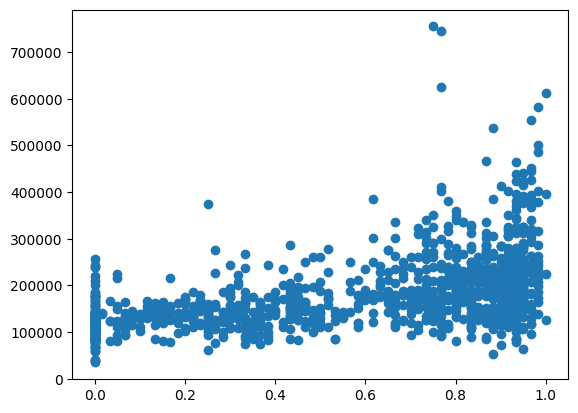

In [171]:
Y = df.iloc[:, n]
X = df_scaled.to_numpy()

for i in range(n):
    plt.scatter(df_scaled.iloc[:, i], Y)
    plt.show()

In [172]:
w = np.zeros(n) #parameter vector
b=0

alpha = 0.05 #learniing rate

epochs = 100 #number of iterations

Cost=np.zeros(epochs)
iter = np.linspace(0, epochs-1, epochs)

for i in range(epochs):
    Y_pred = pd.Series(np.zeros(m))#a pandas series 
    Y_pred = np.dot(X, w) + b * pd.Series(np.ones(m))
    D_w = (1/m)*np.sum(Y_pred- Y)*X
    D_b = (1/m)*np.sum(Y_pred- Y)

    cost = (1/(2*m))*np.sum(pow(Y_pred-Y, 2))
    Cost[i]= cost
    
    w = w - alpha * D_w[0]
    b = b - alpha * D_b

print(w, b)

[46956.99300748 19718.75233867 17608.8723778  11921.38045324
 11827.62884427 12913.71182181 46956.99300748 42261.29370673
 27248.76601529     0.        ] 70435.48951121737


In [173]:
print(Y_pred, Y)
cost = (1/(2*m))*np.sum(pow(Y_pred-Y, 2))
print(cost)

0       185237.079878
1       182700.737142
2       155267.481411
3       248211.976182
4       195129.409295
            ...      
1163    168928.622198
1164    196385.885483
1165    145821.959527
1166    172394.066307
1167    192356.861573
Length: 1168, dtype: float64 0       184000
1       164000
2       130000
3       555000
4       176000
         ...  
1163    149500
1164    160000
1165    115000
1166    165500
1167    180500
Name: SalePrice, Length: 1168, dtype: int64
1750424835.1695807


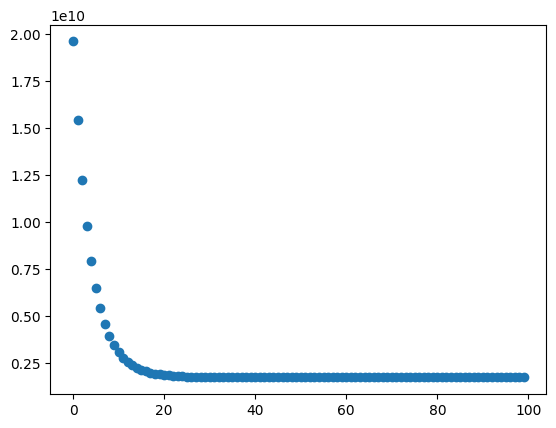

In [174]:
plt.scatter(iter, Cost)
plt.show()

In [175]:
df_test = pd.read_csv("test.csv")
df_test_scaled = df_test.drop("SalePrice" ,axis=1)
df_test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,8,1970,3,753,1085,1120,2,8,2006,2006,281000
1,6,1632,1,338,1240,1632,2,6,1958,1988,139000
2,7,1223,2,480,600,520,2,4,2005,2005,147400
3,5,1559,2,812,1559,1559,1,5,1948,1973,153500
4,4,630,1,286,630,630,1,3,1970,2002,86000


In [176]:
m_test, n_test= df_test_scaled.shape
print(m_test, n_test)

292 10


In [177]:
for i in range(n_test-1):    
    series = df_test_scaled.iloc[:, i]
    
    # Min-Max Scaling (Normalization)
    min_value = series.min()
    max_value = series.max()
    df_test_scaled.iloc[:,i] = (series - min_value) / (max_value - min_value)

In [178]:
Y_test = df_test.iloc[:,n_test]
X_test = df_test_scaled.to_numpy()

print(X_test.shape, Y_test.shape)

(292, 10) (292,)


In [179]:
df_test_scaled.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,0.777778,0.476343,0.75,0.541727,0.339062,0.261905,0.666667,0.454545,0.969231,2006
1,0.555556,0.368286,0.25,0.243165,0.387500,0.441176,0.666667,0.272727,0.600000,1988
2,0.666667,0.237532,0.50,0.345324,0.187500,0.051821,0.666667,0.090909,0.961538,2005
3,0.444444,0.344949,0.50,0.584173,0.487187,0.415616,0.333333,0.181818,0.523077,1973
4,0.333333,0.047954,0.25,0.205755,0.196875,0.090336,0.333333,0.000000,0.692308,2002


In [180]:
Y_pred_test = pd.Series(np.zeros(m_test))#a pandas series 
Y_pred_test = np.dot(X_test, w) + b * pd.Series(np.ones(m_test))
print(Y_pred_test, Y_test)

0      220332.413970
1      180546.104164
2      183579.370186
3      162594.630481
4      131900.519861
           ...      
287    171702.744416
288    151292.308578
289    161811.539498
290    196999.227008
291    196494.417388
Length: 292, dtype: float64 0      281000
1      139000
2      147400
3      153500
4       86000
        ...  
287    158000
288    118000
289    140000
290    159895
291    178900
Name: SalePrice, Length: 292, dtype: int64


In [181]:
cost = (1/(2*m_test))*np.sum(pow(Y_pred_test-Y_test, 2))
print(cost)

1472263469.3576272


In [182]:
def absolute_error_percentage(Y_pred_test, Y_test):
        error = np.abs(Y_pred_test - Y_test)
        error_percentage = error * 100 / Y_test
        absolute_error_percentage = 100 - np.sum(error_percentage)/m_test
        return absolute_error_percentage

def mean_squared_error_percentage(Y_pred_test, Y_test):
        error = (Y_pred_test - Y_test)**2
        error_percentage = error * 100 / (Y_test**2)
        mean_squared_error_percentage = 100 - np.sum(error_percentage)/m_test
        return mean_squared_error_percentage


In [183]:

print(f'average_accuracy_percentage= {absolute_error_percentage(Y_pred_test, Y_test)}')
print(f'mean_squared_error_percentage= {mean_squared_error_percentage(Y_pred_test, Y_test)}')


average_accuracy_percentage= 76.31337438156076
mean_squared_error_percentage= 87.33195377496025


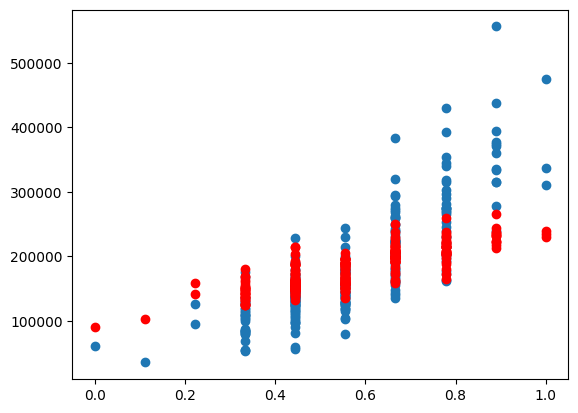

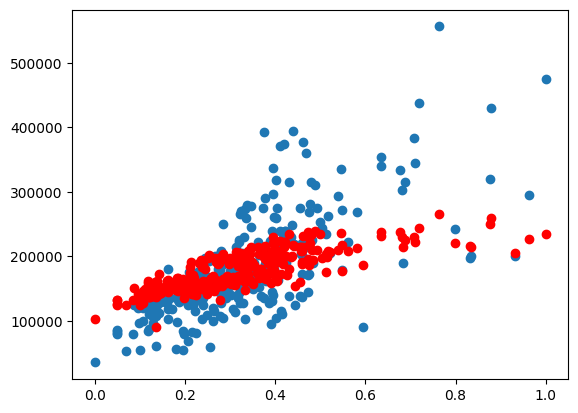

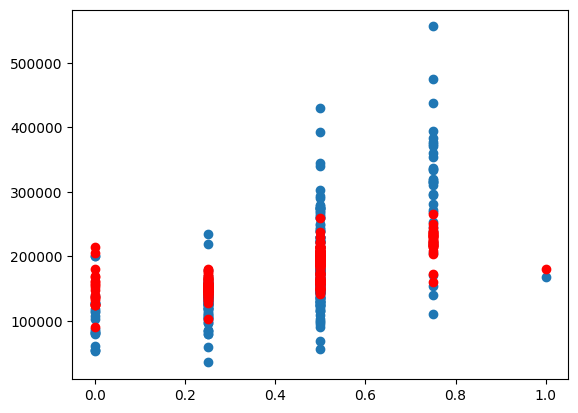

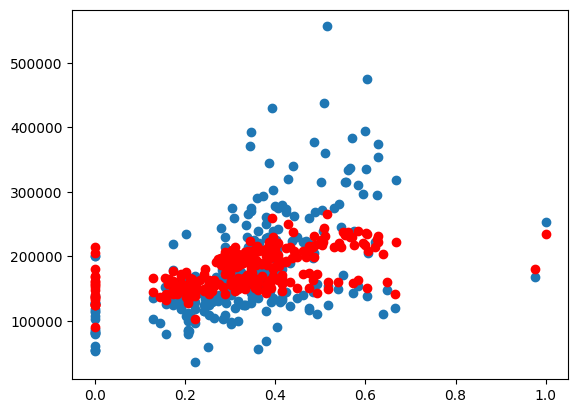

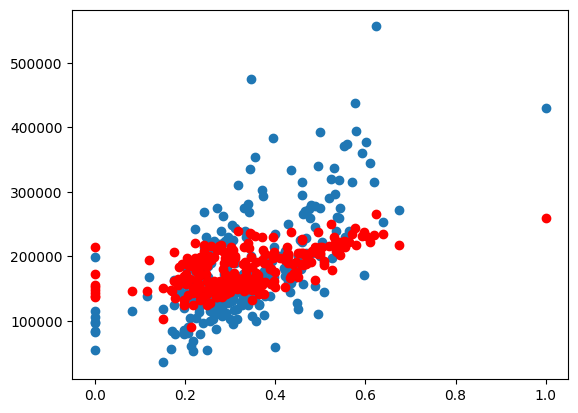

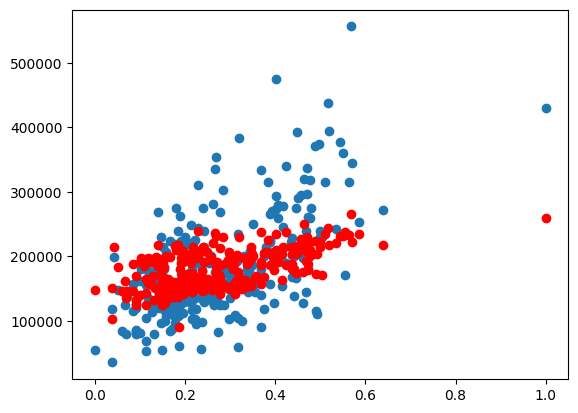

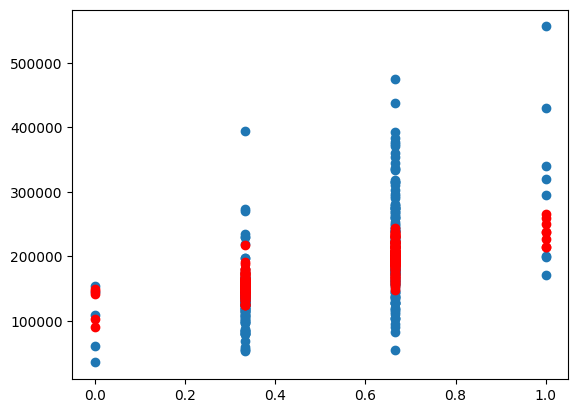

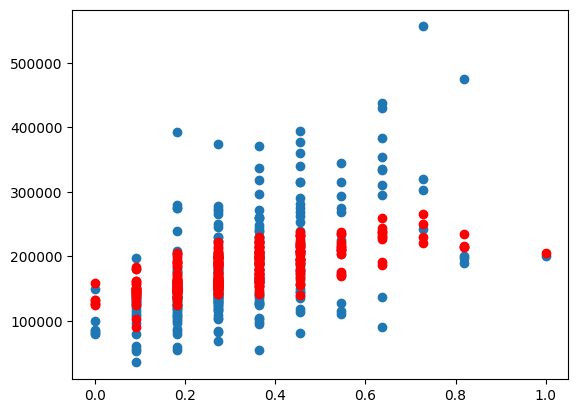

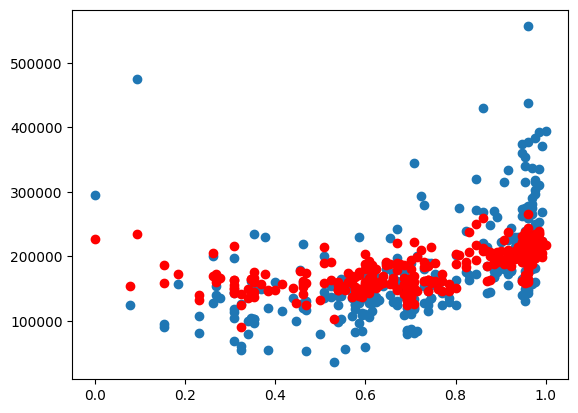

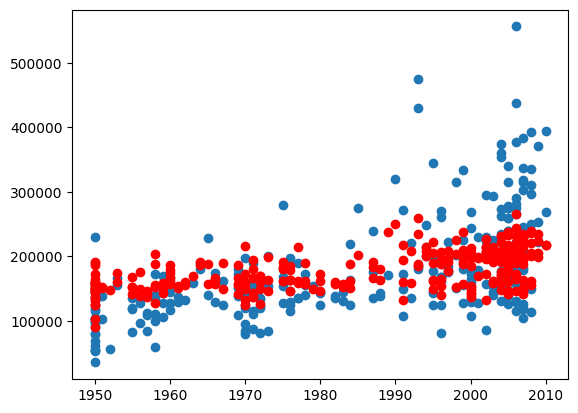

In [185]:
for i in range(n_test):
    plt.scatter(df_test_scaled.iloc[:, i], Y_test)
    plt.scatter(df_test_scaled.iloc[:, i], Y_pred_test, color="red")
    #plt.plot([min(X_test[i]), max(X_test[i])], [min(Y_pred_test), max(Y_pred_test)], color='red')
    plt.show()